In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
from ddpg_agent import Agent
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# get the default brain
env = UnityEnvironment(file_name='Tennis')
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

agent = Agent(state_size=state_size, action_size=action_size, random_seed=0)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


/Users/cmiless/miniconda3/envs/home/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 10	Average Score: -0.00	Score: -0.00
Episode 20	Average Score: -0.00	Score: -0.00
Episode 30	Average Score: -0.00	Score: -0.00
Episode 40	Average Score: -0.00	Score: 0.050
Episode 50	Average Score: -0.00	Score: -0.00
Episode 60	Average Score: -0.00	Score: 0.050
Episode 70	Average Score: -0.00	Score: -0.00
Episode 80	Average Score: -0.00	Score: -0.00
Episode 90	Average Score: -0.00	Score: -0.00
Episode 100	Average Score: -0.00	Score: -0.00
Episode 110	Average Score: -0.00	Score: -0.00
Episode 120	Average Score: -0.00	Score: -0.00
Episode 130	Average Score: -0.00	Score: -0.00
Episode 140	Average Score: -0.00	Score: -0.00
Episode 150	Average Score: -0.00	Score: -0.00
Episode 160	Average Score: -0.00	Score: -0.00
Episode 170	Average Score: -0.00	Score: -0.00
Episode 180	Average Score: -0.00	Score: -0.00
Episode 190	Average Score: -0.00	Score: -0.00
Episode 200	Average Score: -0.00	Score: -0.00


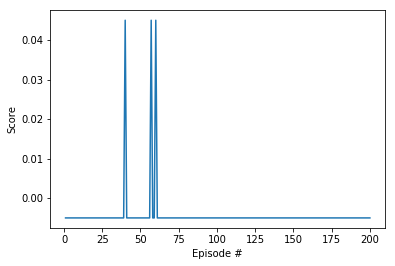

In [3]:
n_episodes=2000
max_t=1000
scores_deque = deque(maxlen=100)
scores_ep = []
max_score = -np.Inf
for i_episode in range(1, n_episodes+1):
#         state = env.reset()
#         agent.reset()
#         score = 0

    env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)

    for t in range(max_t):

        actions = agent.act(states)

        #actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1

        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)

        agent.step(states, actions, rewards, next_states, dones)

        states = next_states                               # roll over states to next time step
        score = np.mean(scores)
        if any(dones):
            break 
    scores_deque.append(score)
    scores_ep.append(score)
    print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score), end="")
    if i_episode % 10 == 0:
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))   


fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores_ep)+1), scores_ep)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


# env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
# states = env_info.vector_observations                  # get the current state (for each agent)
# scores = np.zeros(num_agents)                          # initialize the score (for each agent)
# while True:
#     actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#     actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#     env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#     next_states = env_info.vector_observations         # get next state (for each agent)
#     rewards = env_info.rewards                         # get reward (for each agent)
#     dones = env_info.local_done                        # see if episode finished
#     scores += env_info.rewards                         # update the score (for each agent)
#     states = next_states                               # roll over states to next time step
#     if np.any(dones):                                  # exit loop if episode finished
#         break
# print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

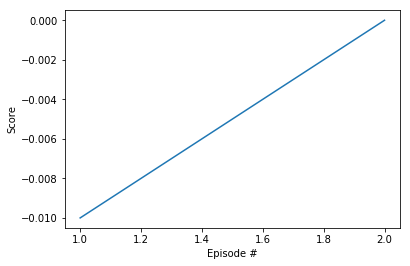

In [4]:

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('rewards.png',format = 'png',dpi=300)
plt.show()


When finished, you can close the environment.

In [ ]:
env.close()